In [1]:
from dataclasses import dataclass

import networkx as nx 
import torch
from torch_geometric.nn import RGCNConv
from torch_geometric.utils import to_networkx

from custom_modules import DataGenerator, PersonnelScheduleEnv, RLagent, ActorMemoryWrapper, Actor

2024-09-03 17:49:27.298499: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-03 17:49:27.449936: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-03 17:49:27.450008: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 17:49:27.450058: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-03 17:49:27.478327: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-03 17:49:27.480167: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
@dataclass
class EvaluationConfig:
    output_dir = "RL_PersSched" 
    max_steps = 8
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    hidden_dim = 5
    num_message_passing = 3

config = EvaluationConfig()

In [ ]:
dim_employee = 1
dim_shift = 7
gnn = GNN((dim_employee, dim_shift), hidden_dim=config.hidden_dim, num_message_layer=config.num_message_layer, device=config.device)
gnn.loader(config.output_dir)

In [4]:
env = PersonnelScheduleEnv(employees=DataGenerator.get_random_employees(5,5), shifts=DataGenerator.get_week_shifts(), assignments=DataGenerator.get_empty_assignments(), device=config.device)
agent = RLagent(gnn) 
actor = Actor(agent, env=env, max_steps=config.max_steps)

In [5]:
steps = actor.execute_episode()

prob:  tensor([0.0473, 0.0523, 0.0477, 0.0527, 0.0473, 0.0523, 0.0477, 0.0527, 0.0473,
        0.0523, 0.0477, 0.0527, 0.0473, 0.0523, 0.0477, 0.0527, 0.0473, 0.0523,
        0.0477, 0.0527], grad_fn=<SoftmaxBackward0>)
action:  14
action edge:  tensor([[3],
        [2]])
current planning:  {0: [], 1: [], 2: [3], 3: []}
prob:  tensor([0.0537, 0.0593, 0.0450, 0.0599, 0.0537, 0.0593, 0.0450, 0.0599, 0.0537,
        0.0593, 0.0450, 0.0599, 0.0462, 0.0471, 0.0072, 0.0282, 0.0537, 0.0593,
        0.0450, 0.0599], grad_fn=<SoftmaxBackward0>)
action:  9
action edge:  tensor([[2],
        [1]])
current planning:  {0: [], 1: [2], 2: [3], 3: []}
prob:  tensor([0.0559, 0.0368, 0.0468, 0.0623, 0.0559, 0.0368, 0.0468, 0.0623, 0.0545,
        0.1037, 0.0334, 0.0707, 0.0481, 0.0474, 0.0074, 0.0293, 0.0559, 0.0368,
        0.0468, 0.0623], grad_fn=<SoftmaxBackward0>)
action:  3
action edge:  tensor([[0],
        [3]])
current planning:  {0: [], 1: [2], 2: [3], 3: [0]}
prob:  tensor([0.0574, 0.0714, 0.

In [6]:
print("Is terminated: ", env.terminated())
print("Planning: ")
env.get_current_planning()

Is terminated:  False
Planning: 


{0: [3], 1: [2, 4], 2: [3], 3: [0, 1]}

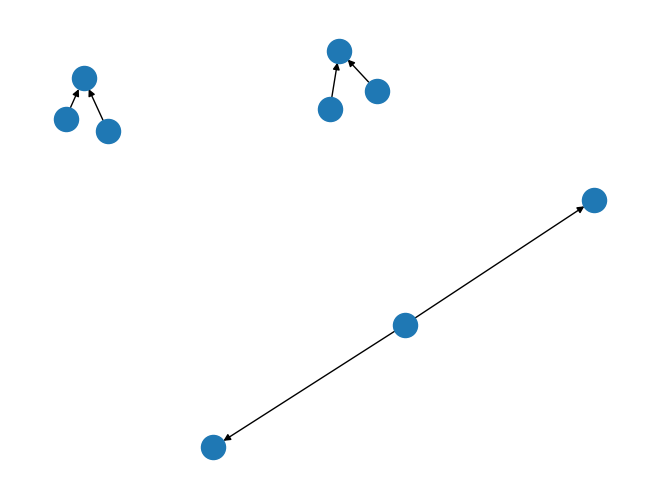

In [7]:
g=to_networkx(env.state)
nx.draw(g)